In [13]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import seaborn as sns

# Set the style for better visuals
sns.set()

# Function to calculate deterministic accumulated wealth
def deterministic_accumulated_wealth(years=30, mean=0.05, initial_wealth=1):
    return initial_wealth * (1 + mean)**np.arange(years)

# Function to calculate and plot the accumulated wealth and confidence intervals
def plot_accumulated_wealth_and_confidence_intervals(mean, variance):
    years = np.arange(1, 31)
    initial_wealth = 1
    accumulated_wealth = deterministic_accumulated_wealth(mean=mean, initial_wealth=initial_wealth)
    
    # Standard deviation of the returns
    std_dev = np.sqrt(variance)
    
    # Calculating confidence intervals at each year
    # For a normal distribution, 65% CI corresponds to ±1 standard deviation, and 95% CI to ±1.96 standard deviations
    lower_bound_65 = accumulated_wealth * np.exp(-1 * std_dev)
    upper_bound_65 = accumulated_wealth * np.exp(1 * std_dev)
    lower_bound_95 = accumulated_wealth * np.exp(-1.96 * std_dev)
    upper_bound_95 = accumulated_wealth * np.exp(1.96 * std_dev)
    
    plt.figure(figsize=(10, 6))
    
    # Plot confidence intervals
    plt.fill_between(years, lower_bound_95, upper_bound_95, color='lightblue', alpha=0.5, label='95% Confidence Interval')
    plt.fill_between(years, lower_bound_65, upper_bound_65, color='blue', alpha=0.5, label='65% Confidence Interval')
    
    # Plot deterministic accumulated wealth
    plt.plot(years, accumulated_wealth, color='maroon', linewidth=2, label='Expected Accumulated Wealth')
    
    plt.title('Expected Accumulated Wealth Over 30 Years with Confidence Intervals')
    plt.xlabel('Year')
    plt.ylabel('Accumulated Wealth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widget for dynamic plotting
interact(plot_accumulated_wealth_and_confidence_intervals,
         mean=FloatSlider(min=-0.05, max=0.15, step=0.01, value=0.05, description='Mean', continuous_update=False),
         variance=FloatSlider(min=0.01, max=1.5, step=0.01, value=0.1, description='Variance', continuous_update=False))


interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='Mean', max=0.15, min=-0.05…

<function __main__.plot_accumulated_wealth_and_confidence_intervals(mean, variance)>

In [14]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, IntSlider, Checkbox
from scipy.stats import norm, t
import seaborn as sns

# Set the style for better visuals
sns.set()

# Function to calculate deterministic accumulated wealth
def deterministic_accumulated_wealth(years=30, mean=0.05, initial_wealth=1):
    return initial_wealth * (1 + mean)**np.arange(years)

# Function to plot with options for normal or t-distribution
def plot_with_distribution(mean, variance, t_distribution, degrees_of_freedom=10):
    years = np.arange(1, 31)
    initial_wealth = 1
    accumulated_wealth = deterministic_accumulated_wealth(mean=mean, initial_wealth=initial_wealth)
    
    # Adjust the plot based on the selected distribution
    if t_distribution:
        # For t-distribution, use the t-quantiles
        quantile_65 = t.ppf([0.175, 0.825], df=degrees_of_freedom)
        quantile_95 = t.ppf([0.025, 0.975], df=degrees_of_freedom)
    else:
        # For normal distribution, use the z-quantiles
        quantile_65 = norm.ppf([0.175, 0.825])
        quantile_95 = norm.ppf([0.025, 0.975])
    
    # Calculate confidence intervals
    lower_bound_65 = accumulated_wealth * np.exp(quantile_65[0] * np.sqrt(variance))
    upper_bound_65 = accumulated_wealth * np.exp(quantile_65[1] * np.sqrt(variance))
    lower_bound_95 = accumulated_wealth * np.exp(quantile_95[0] * np.sqrt(variance))
    upper_bound_95 = accumulated_wealth * np.exp(quantile_95[1] * np.sqrt(variance))
    
    plt.figure(figsize=(10, 6))
    
    # Plot confidence intervals
    plt.fill_between(years, lower_bound_95, upper_bound_95, color='lightblue', alpha=0.5, label='95% Confidence Interval')
    plt.fill_between(years, lower_bound_65, upper_bound_65, color='blue', alpha=0.5, label='65% Confidence Interval')
    
    # Plot deterministic accumulated wealth
    plt.plot(years, accumulated_wealth, color='maroon', linewidth=2, label='Expected Accumulated Wealth')
    
    plt.title('Expected Accumulated Wealth Over 30 Years with Confidence Intervals')
    plt.xlabel('Year')
    plt.ylabel('Accumulated Wealth')
    plt.legend()
    plt.grid(True)
    plt.show()

# Interactive widget for dynamic plotting with distribution switch and degrees of freedom slider
interact(plot_with_distribution,
         mean=FloatSlider(min=-0.05, max=0.15, step=0.01, value=0.05, description='Mean', continuous_update=False),
         variance=FloatSlider(min=0.01, max=1.5, step=0.01, value=0.1, description='Variance', continuous_update=False),
         t_distribution=Checkbox(value=False, description='T-Distribution'),
         degrees_of_freedom=IntSlider(min=1, max=30, step=1, value=10, description='Degrees of Freedom', continuous_update=False))


interactive(children=(FloatSlider(value=0.05, continuous_update=False, description='Mean', max=0.15, min=-0.05…

<function __main__.plot_with_distribution(mean, variance, t_distribution, degrees_of_freedom=10)>

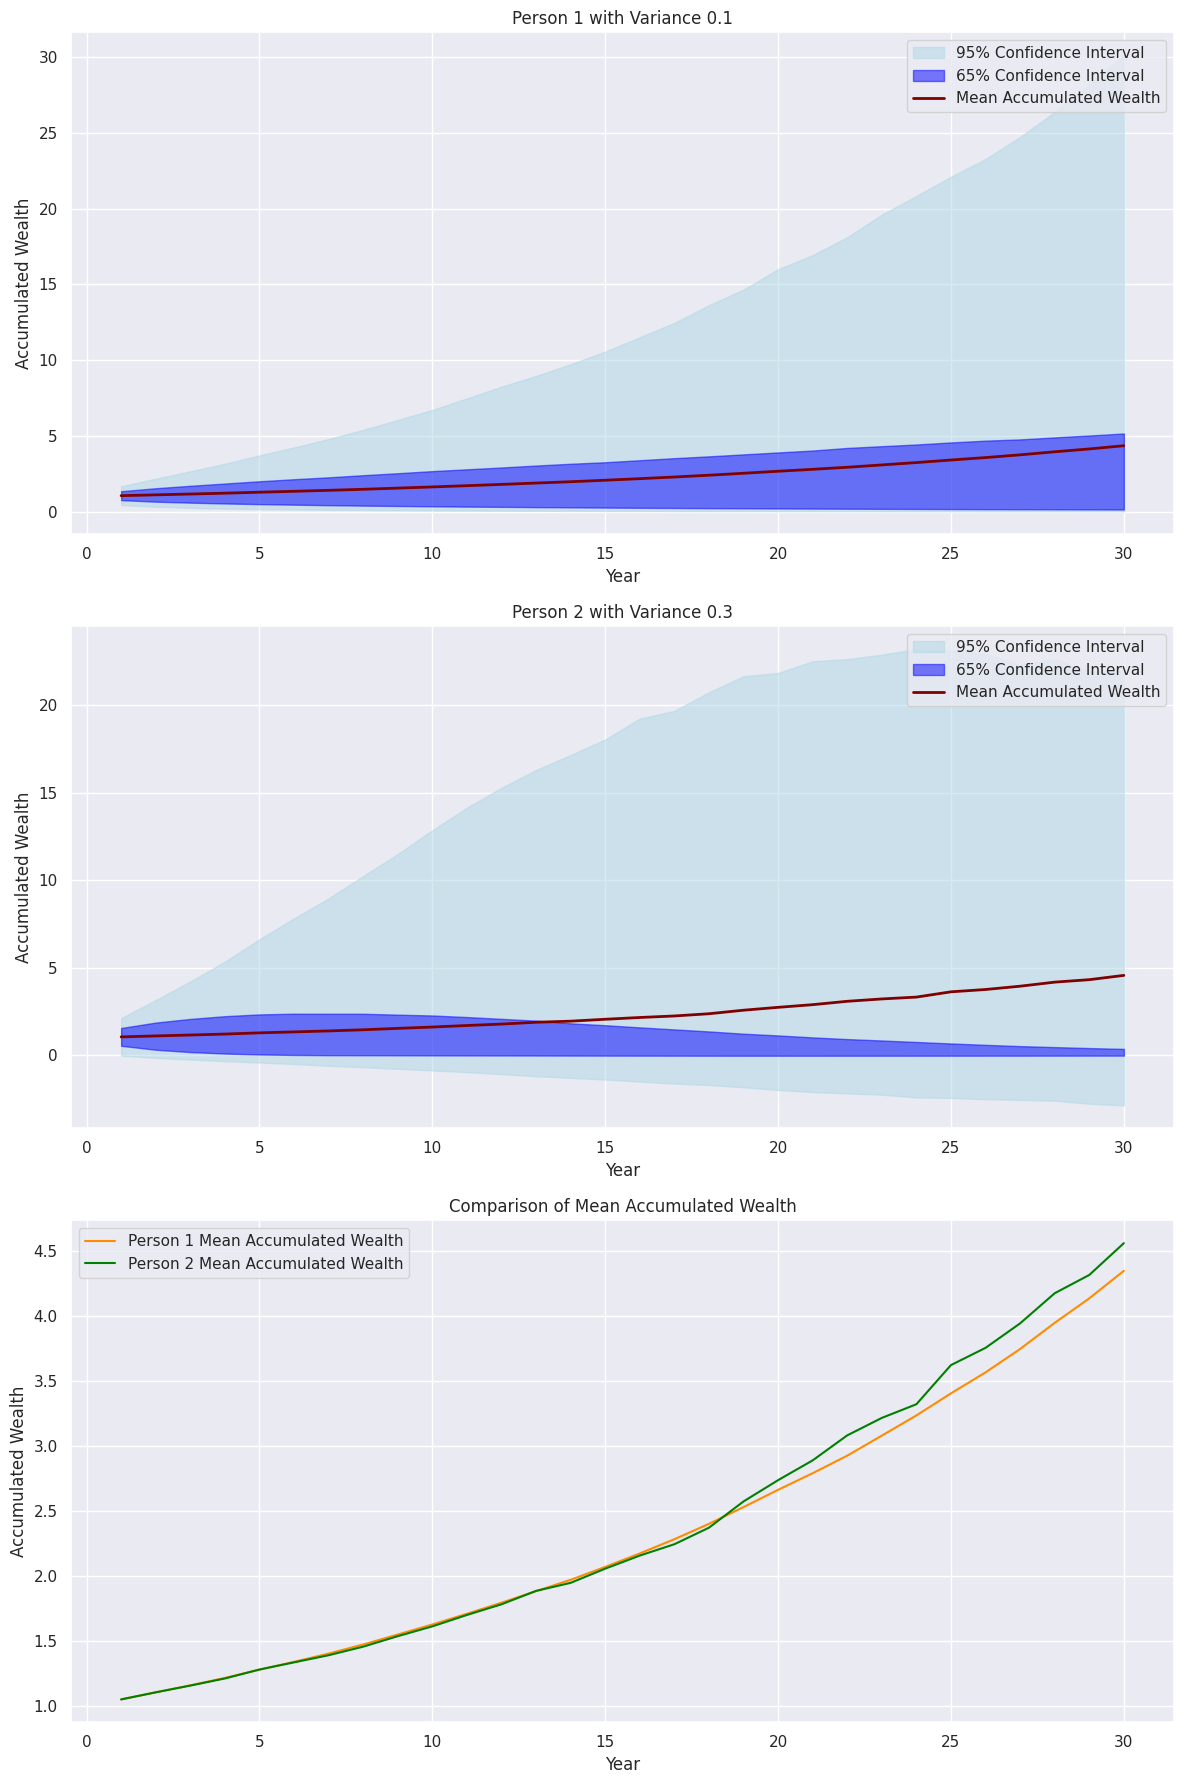

In [18]:

# Constants
initial_wealth = 1
years = 30
expected_annual_return = 0.05
variances = [0.1, 0.3]
simulations = 100000

# Monte Carlo Simulation
def monte_carlo_simulation(initial_wealth, expected_annual_return, variance, years, simulations):
    np.random.seed(0)  # For reproducibility
    annual_returns = np.random.normal(expected_annual_return, np.sqrt(variance), (simulations, years))
    wealth_paths = initial_wealth * np.cumprod(1 + annual_returns, axis=1)
    mean_wealth = wealth_paths.mean(axis=0)
    percentile_65 = np.percentile(wealth_paths, [17.5, 82.5], axis=0)
    percentile_95 = np.percentile(wealth_paths, [2.5, 97.5], axis=0)
    return mean_wealth, percentile_65, percentile_95

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

for i, variance in enumerate(variances):
    mean_wealth, percentile_65, percentile_95 = monte_carlo_simulation(initial_wealth, expected_annual_return, variance, years, simulations)
    axs[i].fill_between(range(1, years+1), percentile_95[0], percentile_95[1], color='lightblue', alpha=0.5, label='95% Confidence Interval')
    axs[i].fill_between(range(1, years+1), percentile_65[0], percentile_65[1], color='blue', alpha=0.5, label='65% Confidence Interval')
    axs[i].plot(range(1, years+1), mean_wealth, color='maroon', linewidth=2, label='Mean Accumulated Wealth')
    axs[i].set_title(f'Person {i+1} with Variance {variance}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Accumulated Wealth')
    axs[i].legend()
    axs[i].grid(True)

# Plot for both returns together without confidence intervals
mean_wealth_1, _, _ = monte_carlo_simulation(initial_wealth, expected_annual_return, variances[0], years, simulations)
mean_wealth_2, _, _ = monte_carlo_simulation(initial_wealth, expected_annual_return, variances[1], years, simulations)
axs[2].plot(range(1, years+1), mean_wealth_1, label='Person 1 Mean Accumulated Wealth', color='darkorange')
axs[2].plot(range(1, years+1), mean_wealth_2, label='Person 2 Mean Accumulated Wealth', color='green')
axs[2].set_title('Comparison of Mean Accumulated Wealth')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Accumulated Wealth')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


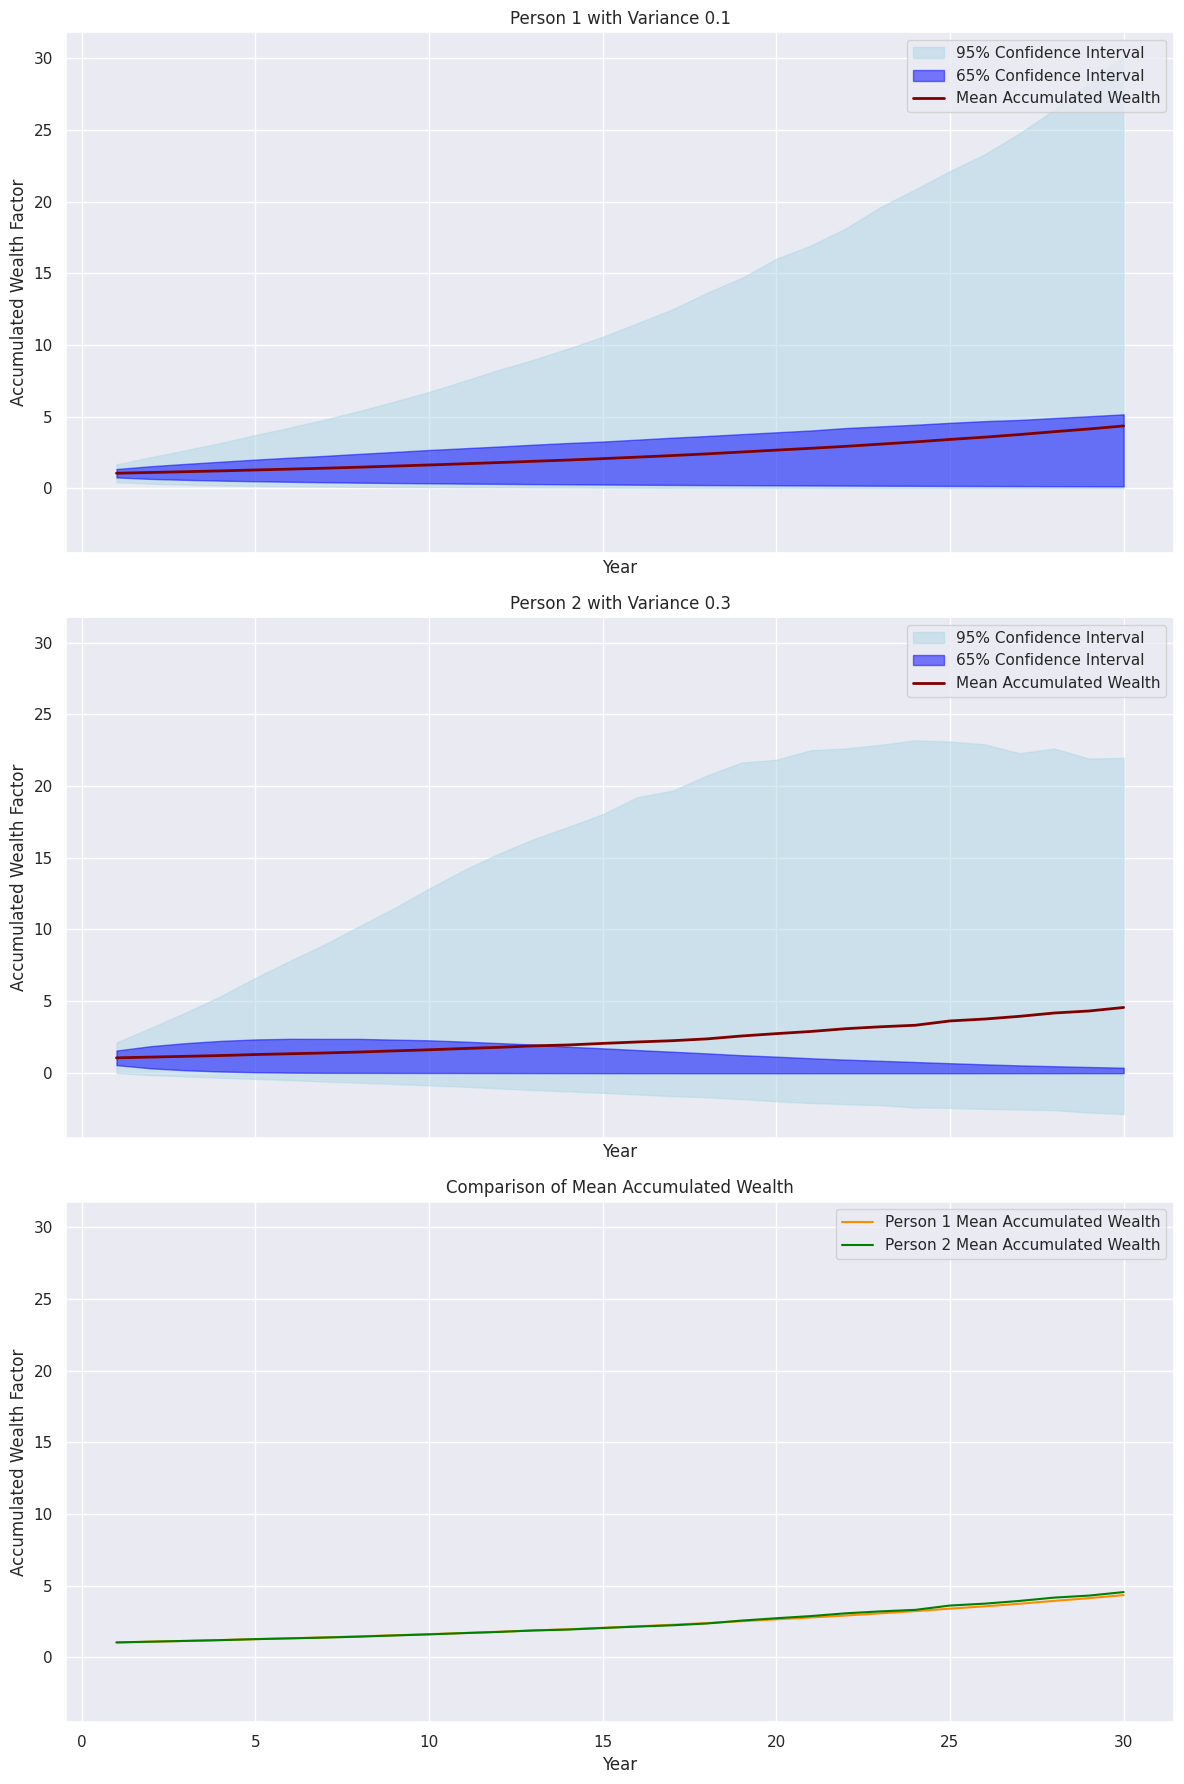

In [19]:
# Adjusted parameters for the Monte Carlo simulation
initial_wealth = 1
simulations = 100000
variances = [0.1, 0.3]

# Performing the Monte Carlo simulations again with updated parameters
results = {}
for variance in variances:
    results[variance] = monte_carlo_simulation(initial_wealth, expected_annual_return, variance, years, simulations)

# Plotting with the updated requirements
fig, axs = plt.subplots(3, 1, figsize=(12, 18), sharex=True, sharey=True)

for i, (variance, (mean_wealth, percentile_65, percentile_95)) in enumerate(results.items()):
    # Plotting the mean with confidence intervals around it
    axs[i].fill_between(range(1, years+1), percentile_95[0], percentile_95[1], color='lightblue', alpha=0.5, label='95% Confidence Interval')
    axs[i].fill_between(range(1, years+1), percentile_65[0], percentile_65[1], color='blue', alpha=0.5, label='65% Confidence Interval')
    axs[i].plot(range(1, years+1), mean_wealth, color='maroon', linewidth=2, label='Mean Accumulated Wealth')
    axs[i].set_title(f'Person {i+1} with Variance {variance}')
    axs[i].set_xlabel('Year')
    axs[i].set_ylabel('Accumulated Wealth Factor')
    axs[i].legend()
    axs[i].grid(True)

# Combined plot of mean accumulated wealth for both variances, without confidence intervals
axs[2].plot(range(1, years+1), results[variances[0]][0], label='Person 1 Mean Accumulated Wealth', color='darkorange')
axs[2].plot(range(1, years+1), results[variances[1]][0], label='Person 2 Mean Accumulated Wealth', color='green')
axs[2].set_title('Comparison of Mean Accumulated Wealth')
axs[2].set_xlabel('Year')
axs[2].set_ylabel('Accumulated Wealth Factor')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()
